 # libraries


In [1]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as px
import pandas as pd
import seaborn as sns
from matplotlib.sankey import Sankey
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma
from scipy import stats
dat = pd.read_csv('Music-and-Therapy-survey-1.csv')


In [2]:
dat.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


# Detecting Missing Values

# data my be missing due to some reasons:
1. user forgot to fill in a field.
2. Data was lost while transferring manually from a legacy database.
3. There was a programming error.
4. Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.
# Here is how you approach finding and fixing missing values in python.
1. load the data frame and study the structure of the data frame
2. Separate categorical and numerical columns in the data frame
3. Find the missing values

You might want to get a summary of your missing values per column, here are some functions you can use:
1. Use isnull() function to identify the missing values in the data frame
2. Use sum() functions to get sum of all missing values per column.
3. use sort_values(ascending=False) function to get columns with the missing values in descending order.
4. Divide by len(df) to get % of missing values in each column.

# fixing the missing values
The cause of missing values can be data corruption or failure to record data. There are 7 ways to handle missing values in the dataset:
1. Deleting Rows with missing values
Handled by deleting the rows or columns having null values.
# Pros:
A model trained with the removal of all missing values creates a robust model.
# Cons:
Loss of a lot of information.
Works poorly if the percentage of missing values is excessive in comparison to the complete dataset.
2. Impute missing values for continuous variable
Columns in the dataset which are having numeric continuous values can be replaced with the mean, median, or mode of remaining values in the column
# Pros:
Prevent data loss which results in deletion of rows or columns
Works well with a small dataset and is easy to implement.
# Cons:
Works only with numerical continuous variables.
Can cause data leakage
Do not factor the covariance between features.
3. Impute missing values for categorical variable
missing values is from categorical columns (string or numerical) then the missing values can be replaced with the most frequent category
# Pros:
Prevent data loss which results in deletion of rows or columns
Works well with a small dataset and is easy to implement.
Negates the loss of data by adding a unique category
# Cons:
Works only with categorical variables.
Addition of new features to the model while encoding, which may result in poor performance


In [3]:
#Separate categorical and numerical columns in the data frame
dat.dtypes == 'objects'

Timestamp                       False
Age                             False
Primary streaming service       False
Hours per day                   False
While working                   False
Instrumentalist                 False
Composer                        False
Fav genre                       False
Exploratory                     False
Foreign languages               False
BPM                             False
Frequency [Classical]           False
Frequency [Country]             False
Frequency [EDM]                 False
Frequency [Folk]                False
Frequency [Gospel]              False
Frequency [Hip hop]             False
Frequency [Jazz]                False
Frequency [K pop]               False
Frequency [Latin]               False
Frequency [Lofi]                False
Frequency [Metal]               False
Frequency [Pop]                 False
Frequency [R&B]                 False
Frequency [Rap]                 False
Frequency [Rock]                False
Frequency [V

In [4]:
num_vars = dat.columns[dat.dtypes !='objects']
cat_vars = dat.columns[dat.dtypes =='objects']
print(num_vars)
print(cat_vars)

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')
Index([], dtype='object')


In [5]:
# check the data types
dat.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [48]:
catg=dat.select_dtypes("object")
cont=dat.select_dtypes("number")

In [49]:
catg.head()

,Timestamp,primarystreamingservice,whileworking,Instrumentalist,Composer,favgenre,Exploratory,foreignlanguages,Frequency [Classical],Frequency [Country],...,Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],frequency[R&B],frequency[Rap],frequency[Rock],Frequency [Video game music],musiceffects,Permissions
0,8/27/2022 19:29,Spotify,Yes,Yes,Yes,Latin,Yes,Yes,Rarely,Never,...,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,NaN,I understand.
1,8/27/2022 19:57,Pandora,Yes,No,No,Rock,Yes,No,Sometimes,Never,...,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,NaN,I understand.
2,8/27/2022 21:28,Spotify,No,No,No,Video game music,No,Yes,Never,Never,...,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,No effect,I understand.
3,8/27/2022 21:40,YouTube Music,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,Never,...,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,Improve,I understand.
4,8/27/2022 21:54,Spotify,Yes,No,No,R&B,Yes,No,Never,Never,...,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,Improve,I understand.


In [50]:
cont.head()

,Age,hoursperday,BPM,Anxiety,Depression,Insomnia,OCD
0,18.0,3.0,156.0,3.0,0.0,1.0,0.0
1,63.0,1.5,119.0,7.0,2.0,2.0,1.0
2,18.0,4.0,132.0,7.0,7.0,10.0,2.0
3,61.0,2.5,84.0,9.0,7.0,3.0,3.0
4,18.0,4.0,107.0,7.0,2.0,5.0,9.0


In [51]:
dat.groupby(['Age', 'hoursperday', 'BPM', 'Anxiety','Depression', 'Insomnia', 'OCD']).mean()

C:\Users\JANE ATEKA\AppData\Local\Temp\ipykernel_3112\201295993.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  dat.groupby(['Age', 'hoursperday', 'BPM', 'Anxiety','Depression', 'Insomnia', 'OCD']).mean()


Empty DataFrame
Columns: []
Index: [(10.0, 2.0, 112.0, 8.0, 2.0, 1.0, 1.0), (12.0, 0.5, 109.0, 7.0, 8.0, 6.0, 2.0), (13.0, 1.0, 128.0, 10.0, 10.0, 8.0, 4.0), (13.0, 2.0, 120.0, 7.0, 10.0, 5.0, 6.0), (13.0, 2.5, 118.0, 8.0, 0.0, 0.0, 3.0), (13.0, 3.0, 80.0, 8.0, 7.0, 9.0, 2.0), (13.0, 4.0, 126.0, 8.0, 5.0, 10.0, 3.0), (13.0, 6.0, 112.0, 4.0, 0.0, 0.0, 2.0), (13.0, 10.0, 140.0, 7.0, 2.0, 0.0, 8.0), (14.0, 0.5, 173.0, 4.0, 0.0, 4.0, 0.0), (14.0, 1.0, 140.0, 6.0, 6.0, 3.0, 0.0), (14.0, 1.5, 140.0, 1.0, 2.0, 4.0, 3.0), (14.0, 2.0, 78.0, 6.0, 0.0, 0.0, 0.0), (14.0, 2.0, 114.0, 4.0, 4.0, 2.0, 2.0), (14.0, 2.0, 136.0, 7.0, 5.0, 2.0, 6.0), (14.0, 2.0, 181.0, 7.0, 5.0, 3.0, 2.0), (14.0, 3.0, 76.0, 2.0, 6.0, 3.0, 0.0), (14.0, 4.0, 81.0, 8.0, 6.0, 5.0, 7.0), (14.0, 4.0, 106.0, 6.0, 8.0, 8.0, 2.0), (14.0, 5.0, 40.0, 3.0, 0.0, 2.0, 3.0), (14.0, 7.0, 95.0, 3.0, 2.0, 8.0, 0.0), (14.0, 7.0, 108.0, 7.0, 3.0, 1.0, 2.0), (14.0, 7.0, 110.0, 2.0, 0.0, 0.0, 0.0), (14.0, 9.0, 140.0, 10.0, 8.0, 9.0, 5.0), (14.0, 10.0, 95.0, 5.0, 2.0, 5.0, 0.0), (14.0, 12.0, 136.0, 8.0, 6.0, 10.0, 5.0), (15.0, 1.0, 150.0, 4.0, 2.0, 3.0, 2.0), (15.0, 2.0, 102.0, 9.0, 8.0, 10.0, 9.0), (15.0, 2.0, 105.0, 4.0, 0.0, 6.0, 5.0), (15.0, 2.0, 145.0, 6.0, 0.0, 0.0, 2.0), (15.0, 2.0, 156.0, 3.0, 2.0, 6.0, 7.0), (15.0, 2.0, 171.0, 9.0, 6.0, 1.0, 7.0), (15.0, 3.0, 84.0, 6.0, 6.0, 2.0, 6.0), (15.0, 3.0, 118.0, 9.0, 6.0, 8.0, 5.0), (15.0, 3.0, 120.0, 7.0, 3.0, 0.0, 2.0), (15.0, 3.0, 132.0, 4.0, 3.0, 5.0, 0.0), (15.0, 3.0, 204.0, 4.0, 0.0, 0.0, 0.0), (15.0, 4.0, 105.0, 3.0, 5.0, 4.0, 0.0), (15.0, 4.0, 105.0, 8.0, 6.0, 4.0, 0.0), (15.0, 4.0, 140.0, 10.0, 7.0, 3.0, 2.0), (15.0, 5.0, 87.0, 6.0, 7.0, 7.0, 4.0), (15.0, 5.0, 126.0, 10.0, 6.0, 0.0, 4.0), (15.0, 5.0, 161.0, 6.0, 7.0, 8.0, 2.0), (15.0, 6.0, 97.0, 8.0, 3.0, 5.0, 2.0), (15.0, 6.0, 110.0, 8.0, 8.0, 7.0, 10.0), (15.0, 8.0, 120.0, 6.0, 9.0, 3.0, 0.0), (15.0, 8.0, 193.0, 8.0, 7.0, 5.0, 0.0), (16.0, 0.5, 156.0, 8.0, 0.0, 0.0, 0.0), (16.0, 1.0, 75.0, 0.0, 0.0, 0.0, 0.0), (16.0, 1.0, 140.0, 7.0, 4.0, 6.0, 3.0), (16.0, 2.0, 112.0, 7.0, 4.0, 10.0, 2.0), (16.0, 2.0, 126.0, 1.0, 8.0, 0.0, 0.0), (16.0, 2.0, 145.0, 10.0, 3.5, 5.0, 10.0), (16.0, 2.0, 149.0, 6.0, 2.0, 4.0, 3.0), (16.0, 2.0, 155.0, 7.0, 5.0, 3.0, 1.0), (16.0, 2.5, 103.0, 2.0, 1.0, 0.0, 0.0), (16.0, 2.5, 110.0, 5.0, 3.0, 3.0, 1.0), (16.0, 3.0, 72.0, 9.0, 7.0, 10.0, 6.0), (16.0, 3.0, 84.0, 10.0, 6.0, 8.0, 10.0), (16.0, 3.0, 90.0, 7.0, 3.5, 3.5, 5.5), (16.0, 3.0, 100.0, 4.0, 2.0, 0.0, 0.0), (16.0, 3.0, 112.0, 3.0, 4.0, 6.0, 8.0), (16.0, 3.0, 115.0, 2.0, 7.0, 0.0, 0.0), (16.0, 3.0, 120.0, 6.0, 0.0, 0.0, 0.0), (16.0, 3.0, 140.0, 7.0, 5.0, 5.0, 3.0), (16.0, 3.0, 150.0, 5.0, 7.0, 1.0, 4.0), (16.0, 3.0, 174.0, 10.0, 2.0, 7.0, 8.0), (16.0, 4.0, 85.0, 7.0, 1.0, 3.0, 5.0), (16.0, 4.0, 96.0, 3.0, 0.0, 6.0, 9.0), (16.0, 4.0, 140.0, 8.0, 9.0, 4.0, 0.0), (16.0, 4.0, 150.0, 7.5, 5.0, 7.0, 8.5), (16.0, 4.0, 624.0, 4.0, 7.0, 1.0, 3.0), (16.0, 5.0, 129.0, 7.0, 4.0, 8.0, 0.0), (16.0, 5.0, 167.0, 7.0, 7.0, 8.0, 4.0), (16.0, 6.0, 105.0, 10.0, 7.0, 6.0, 10.0), (16.0, 6.0, 169.0, 7.0, 8.0, 7.0, 5.0), (16.0, 7.0, 999999999.0, 4.0, 8.0, 8.0, 4.0), (16.0, 8.0, 103.0, 8.0, 8.0, 4.0, 3.0), (16.0, 8.0, 120.0, 8.0, 9.0, 5.0, 10.0), (16.0, 9.0, 130.0, 10.0, 10.0, 10.0, 8.0), (16.0, 10.0, 105.0, 0.0, 0.0, 0.0, 0.0), (16.0, 10.0, 180.0, 10.0, 9.0, 3.0, 2.0), (16.0, 12.0, 120.0, 5.0, 7.0, 10.0, 0.0), (16.0, 15.0, 85.0, 8.0, 10.0, 9.0, 2.0), (16.0, 24.0, 120.0, 5.0, 1.0, 9.0, 1.0), (17.0, 0.0, 89.0, 10.0, 0.0, 0.0, 0.0), (17.0, 0.5, 136.0, 6.0, 3.0, 1.0, 1.0), (17.0, 1.0, 70.0, 8.0, 3.0, 9.0, 2.0), (17.0, 1.0, 105.0, 8.0, 5.0, 2.0, 3.0), (17.0, 1.0, 118.0, 7.0, 3.0, 1.0, 5.0), (17.0, 1.0, 137.0, 9.0, 8.0, 4.0, 0.0), (17.0, 1.0, 183.0, 8.0, 2.0, 1.0, 5.0), (17.0, 1.5, 174.0, 7.0, 5.0, 1.0, 2.0), (17.0, 1.5, 180.0, 8.0, 7.0, 7.0, 3.0), (17.0, 2.0, 76.0, 7.0, 6.0, 0.0, 4.0), (17.0, 2.0, 93.0, 0.0, 8.0, 0.0, 0.0), (17.0, 2.0, 94.0, 5.0, 2.0, 3.0, 4.0), (17.0, 2.0, 116.0, 9.0, 4.0, 0.0, 1.0), (17.0, 2.0, 117.0, 9.0, 8

In [67]:
#counting the total number of missing values
pd.isnull(dat).sum().sum()

0

In [65]:
#mynum_colm=dat.select_dtypes(include=np.number).columns.tolist()


In [66]:
#dat.fillna(dat.mean(numeric_only=True).round(1), inplace=True)

In [11]:
dat[num_vars].isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [12]:
dat[num_vars].isnull().sum().sort_values(ascending=False)

BPM                             107
Music effects                     8
Instrumentalist                   4
Foreign languages                 4
While working                     3
Primary streaming service         1
Composer                          1
Age                               1
Frequency [Video game music]      0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Timestamp                         0
Anxiety                           0
Depression                        0
Frequency [Lofi]                  0
Insomnia                          0
OCD                               0
Frequency [Metal]                 0
Frequency [Hip hop]               0
Frequency [Latin]                 0
Frequency [K pop]                 0
Frequency [Jazz]                  0
Frequency [Gospel]                0
Frequency [Folk]                  0
Frequency [EDM]                   0
Frequency [Country]         

In [13]:
dat[num_vars].isnull().sum().sort_values(ascending=False)/len(dat)

BPM                             0.145380
Music effects                   0.010870
Instrumentalist                 0.005435
Foreign languages               0.005435
While working                   0.004076
Primary streaming service       0.001359
Composer                        0.001359
Age                             0.001359
Frequency [Video game music]    0.000000
Frequency [Pop]                 0.000000
Frequency [R&B]                 0.000000
Frequency [Rap]                 0.000000
Frequency [Rock]                0.000000
Timestamp                       0.000000
Anxiety                         0.000000
Depression                      0.000000
Frequency [Lofi]                0.000000
Insomnia                        0.000000
OCD                             0.000000
Frequency [Metal]               0.000000
Frequency [Hip hop]             0.000000
Frequency [Latin]               0.000000
Frequency [K pop]               0.000000
Frequency [Jazz]                0.000000
Frequency [Gospe

In [14]:
# making new data frame with dropped NA values 
new_dat = dat.dropna(axis = 0, how ='any')     
new_dat

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [15]:
#To convert the  column names lowercase
dat.columns.str.lower()
dat.columns.str.replace(' ','_')

Index(['Timestamp', 'Age', 'Primary_streaming_service', 'Hours_per_day',
       'While_working', 'Instrumentalist', 'Composer', 'Fav_genre',
       'Exploratory', 'Foreign_languages', 'BPM', 'Frequency_[Classical]',
       'Frequency_[Country]', 'Frequency_[EDM]', 'Frequency_[Folk]',
       'Frequency_[Gospel]', 'Frequency_[Hip_hop]', 'Frequency_[Jazz]',
       'Frequency_[K_pop]', 'Frequency_[Latin]', 'Frequency_[Lofi]',
       'Frequency_[Metal]', 'Frequency_[Pop]', 'Frequency_[R&B]',
       'Frequency_[Rap]', 'Frequency_[Rock]', 'Frequency_[Video_game_music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music_effects',
       'Permissions'],
      dtype='object')

In [16]:
dat=dat.rename(columns = {'Primary streaming service' :'primarystreamingservice', 'Hours per day':'hoursperday', 'While working':'whileworking', 'Fav genre':'favgenre', 'Foreign languages':'foreignlanguages', 'Frequency [R&B]':'frequency[R&B]',
       'Frequency [Rap]':'frequency[Rap]', 'Frequency [Rock]':'frequency[Rock]', 'Music effects':'musiceffects',
}, inplace = False)
dat.head()

,Timestamp,Age,primarystreamingservice,hoursperday,whileworking,Instrumentalist,Composer,favgenre,Exploratory,foreignlanguages,...,frequency[R&B],frequency[Rap],frequency[Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,musiceffects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [17]:
#missing values
null = pd.isnull(dat)
null.head()


,Timestamp,Age,primarystreamingservice,hoursperday,whileworking,Instrumentalist,Composer,favgenre,Exploratory,foreignlanguages,...,frequency[R&B],frequency[Rap],frequency[Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,musiceffects,Permissions
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
dat.columns.str.replace(' ','_')

Index(['Timestamp', 'Age', 'primarystreamingservice', 'hoursperday',
       'whileworking', 'Instrumentalist', 'Composer', 'favgenre',
       'Exploratory', 'foreignlanguages', 'BPM', 'Frequency_[Classical]',
       'Frequency_[Country]', 'Frequency_[EDM]', 'Frequency_[Folk]',
       'Frequency_[Gospel]', 'Frequency_[Hip_hop]', 'Frequency_[Jazz]',
       'Frequency_[K_pop]', 'Frequency_[Latin]', 'Frequency_[Lofi]',
       'Frequency_[Metal]', 'Frequency_[Pop]', 'frequency[R&B]',
       'frequency[Rap]', 'frequency[Rock]', 'Frequency_[Video_game_music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'musiceffects',
       'Permissions'],
      dtype='object')

In [19]:
# check value counts of a column
dat['primarystreamingservice'].value_counts()

Spotify                              458
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: primarystreamingservice, dtype: int64

In [20]:
# check value counts of a column
dat['favgenre'].value_counts()

Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: favgenre, dtype: int64

In [21]:
# create pivot table
pd.pivot_table(dat, values='hoursperday', index='favgenre', columns='Age', aggfunc=np.mean,fill_value=0 )

Age,10.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,...,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,80.0,89.0
favgenre,,,,,,,,,,,,,,,,,,,,,
Classical,0,1.5,3.5,3.125000,3.000000,2.000000,3.300000,1.000000,2.600000,3.000000,...,0.000000,0,4,0,0.00,0,0,0,3,0
Country,0,0.0,0.0,7.000000,0.000000,0.000000,2.500000,3.000000,4.250000,4.166667,...,0.000000,0,0,2,0.00,0,0,0,0,0
EDM,0,0.0,0.0,0.000000,2.000000,6.600000,2.000000,7.666667,7.000000,2.500000,...,0.000000,0,0,0,0.00,0,0,0,0,0
Folk,0,0.0,2.5,0.000000,5.000000,2.000000,1.500000,5.000000,0.000000,0.000000,...,0.000000,0,0,0,0.00,0,0,0,0,0
Gospel,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,...,0.000000,1,0,0,0.25,0,0,0,0,0
Hip hop,0,0.0,0.0,0.000000,5.500000,10.000000,4.500000,3.300000,4.000000,3.500000,...,0.000000,0,0,0,0.00,0,0,0,0,0
Jazz,0,0.0,0.0,7.000000,0.000000,5.000000,2.000000,8.333333,3.000000,8.000000,...,0.000000,0,0,0,0.00,0,0,0,0,0
K pop,0,0.0,0.0,2.000000,4.500000,4.000000,10.000000,3.857143,3.666667,1.000000,...,0.000000,0,0,0,0.00,0,0,0,0,0
Latin,0,0.0,0.0,0.000000,0.000000,0.000000,12.000000,4.000000,0.000000,0.000000,...,0.000000,0,0,0,0.00,0,0,0,0,0


In [22]:
# Replace the NaNs in column S2 & S3 by the mean of values
# in column S2 & S3 respectively
dat[['favgenre','Age']] = dat[['favgenre','Age']].fillna(value=dat[['favgenre','Age']].mean())
print('Updated Dataframe:')
print(dat)

Updated Dataframe:
            Timestamp   Age  primarystreamingservice  hoursperday  \
0     8/27/2022 19:29  18.0                  Spotify          3.0   
1     8/27/2022 19:57  63.0                  Pandora          1.5   
2     8/27/2022 21:28  18.0                  Spotify          4.0   
3     8/27/2022 21:40  61.0            YouTube Music          2.5   
4     8/27/2022 21:54  18.0                  Spotify          4.0   
..                ...   ...                      ...          ...   
731  10/30/2022 14:37  17.0                  Spotify          2.0   
732   11/1/2022 22:26  18.0                  Spotify          1.0   
733   11/3/2022 23:24  19.0  Other streaming service          6.0   
734   11/4/2022 17:31  19.0                  Spotify          5.0   
735    11/9/2022 1:55  29.0            YouTube Music          2.0   

    whileworking Instrumentalist Composer          favgenre Exploratory  \
0            Yes             Yes      Yes             Latin         Yes   
1 

C:\Users\JANE ATEKA\AppData\Local\Temp\ipykernel_3112\2455610431.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dat[['favgenre','Age']] = dat[['favgenre','Age']].fillna(value=dat[['favgenre','Age']].mean())


In [23]:
# apply get_dummies function
dat_encoded = pd.get_dummies(dat["primarystreamingservice"])
dat_encoded .head()

,Apple Music,I do not use a streaming service.,Other streaming service,Pandora,Spotify,YouTube Music
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,0,1,0


In [24]:
# apply get_dummies function
dat_encoded = pd.get_dummies(dat["favgenre"])
dat_encoded .head()

,Classical,Country,EDM,Folk,Gospel,Hip hop,Jazz,K pop,Latin,Lofi,Metal,Pop,R&B,Rap,Rock,Video game music
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [54]:
dat = dat.apply(lambda x:x.fillna(x.value_counts().index[0]))

# Outliers
An outlier is a data point in a data set that is distant from all other observations. outliers are the extreme values within the dataset.
why are outliers a point of reseach?

# An outlier could exist in a dataset due to
1. Variability in the data
2. An experimental measurement error

# ways to identify an outlier
1. using boxplot
2. using Z score
3. using the IQR interquartile range
This are visual methods for finding outliers.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hoursperday', ylabel='Density'>

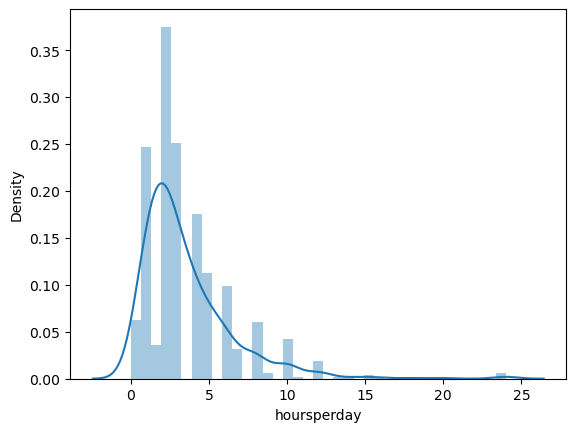

In [26]:
#outliers in hoyrs per day
sns.distplot(dat['hoursperday'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

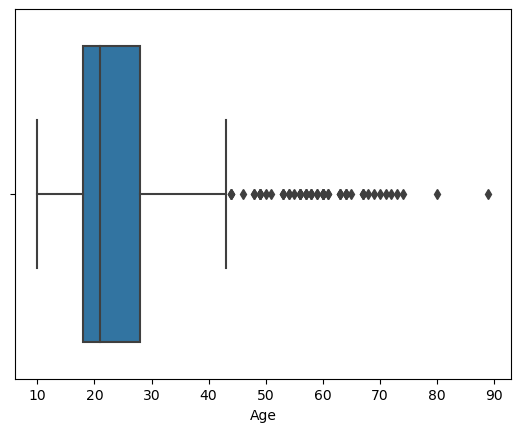

In [27]:
#outliers in Age
sns.boxplot(dat['Age'])

# Boxplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hoursperday'>

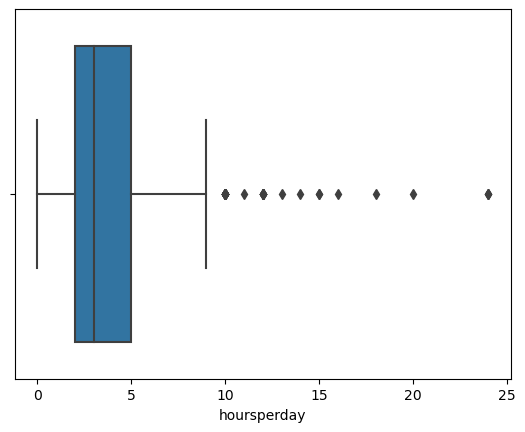

In [28]:
#Boxplot in hours per day
sns.boxplot(dat['hoursperday'])

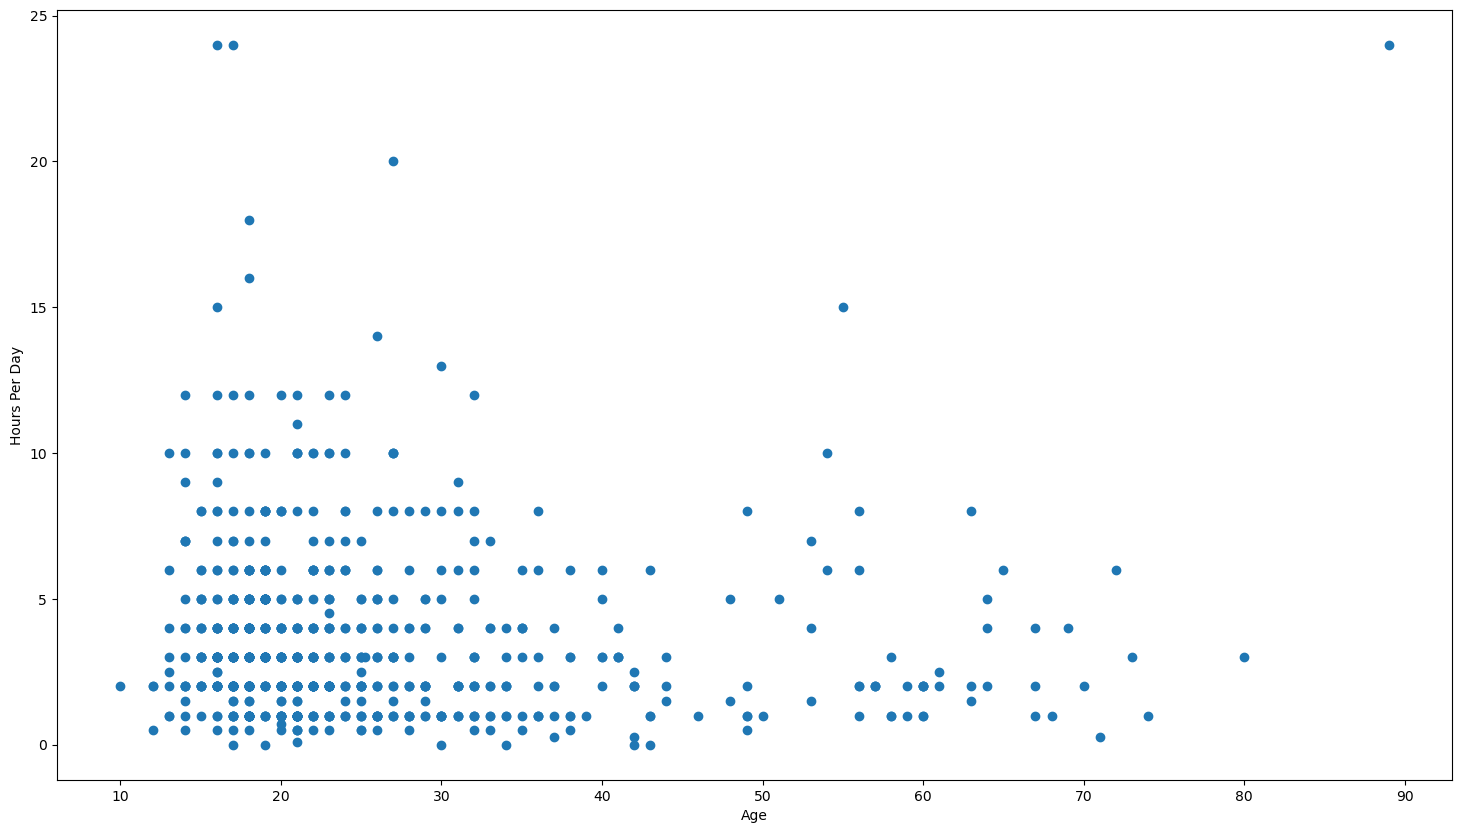

In [29]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(dat['Age'], dat['hoursperday'])
 
# x-axis label
ax.set_xlabel('Age')
 
# y-axis label
ax.set_ylabel('Hours Per Day')
plt.show()

In [30]:
z = np.abs(stats.zscore(dat['Depression']))
print(z)

0      1.584570
1      0.923809
2      0.728094
3      0.728094
4      0.923809
         ...   
731    0.397714
732    0.923809
733    0.923809
734    0.593428
735    0.923809
Name: Depression, Length: 736, dtype: float64


In [31]:
z = np.abs(stats.zscore(dat['hoursperday']))
print(z)

0      0.189270
1      0.684951
2      0.141184
3      0.354497
4      0.141184
         ...   
731    0.519724
732    0.850178
733    0.802091
734    0.471638
735    0.519724
Name: hoursperday, Length: 736, dtype: float64


In [32]:
z = np.abs(stats.zscore(dat['Anxiety']))
print(z)

0      1.016652
1      0.416445
2      0.416445
3      1.132994
4      0.416445
         ...   
731    0.416445
732    1.016652
733    1.374927
734    1.374927
735    1.374927
Name: Anxiety, Length: 736, dtype: float64


# Visualization

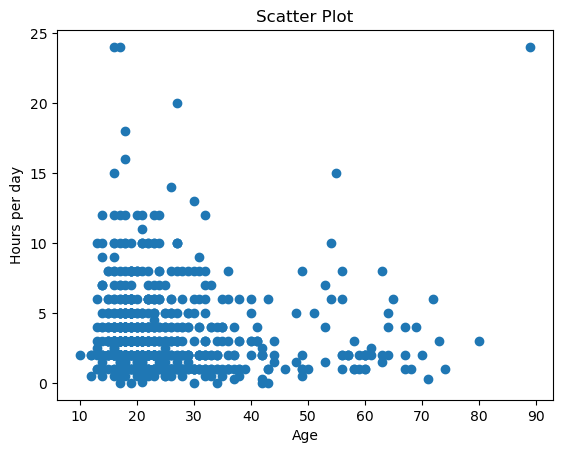

In [33]:
#Scatter plot of age against hours per day
plt.scatter(dat['Age'], dat['hoursperday'])
plt.title("Scatter Plot")
plt.xlabel('Age')
plt.ylabel('Hours per day')
 
plt.show()

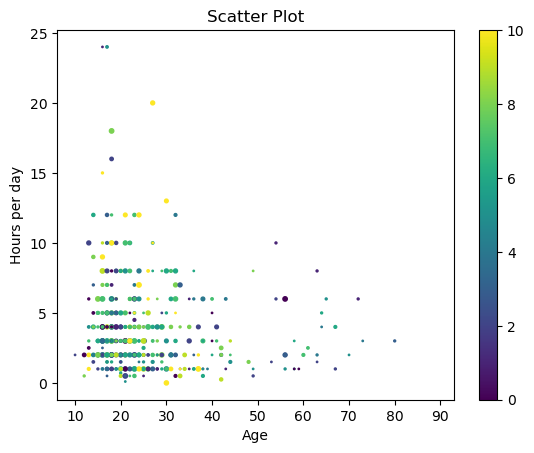

In [34]:
#scatter plot showing data of depression on age against hours per day
plt.scatter(dat['Age'], dat['hoursperday'], c=dat['Depression'],
            s=dat['OCD'])
 
plt.title("Scatter Plot")
 
plt.xlabel('Age')
plt.ylabel('Hours per day')
 
plt.colorbar()
 
plt.show()

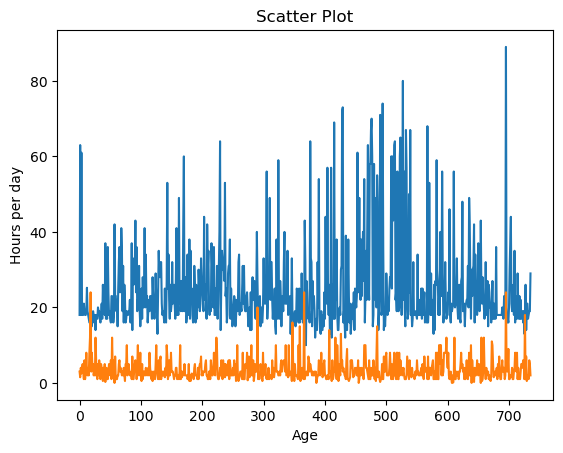

In [35]:
plt.plot(dat['Age'])
plt.plot(dat['hoursperday'])
 
plt.title("Scatter Plot")

plt.xlabel('Age')
plt.ylabel('Hours per day')
 
plt.show()

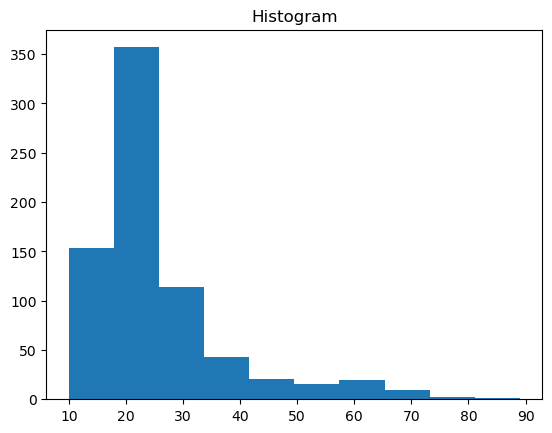

In [36]:
#histogram
plt.hist(dat['Age'])
 
plt.title("Histogram")

plt.show()

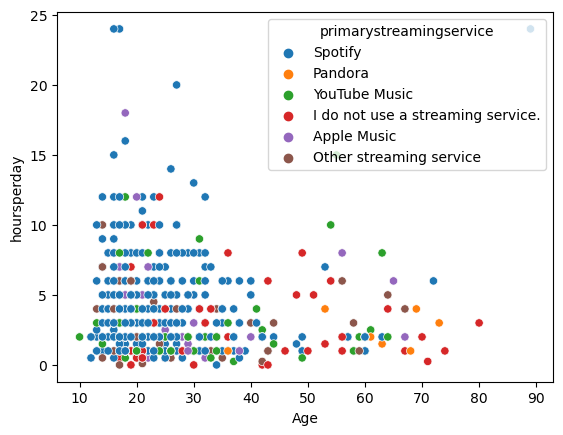

In [37]:
#scatterplot showing primary streaming service on age against hour per day
sns.scatterplot(x='Age', y='hoursperday', data=dat,
               hue='primarystreamingservice')
plt.show()

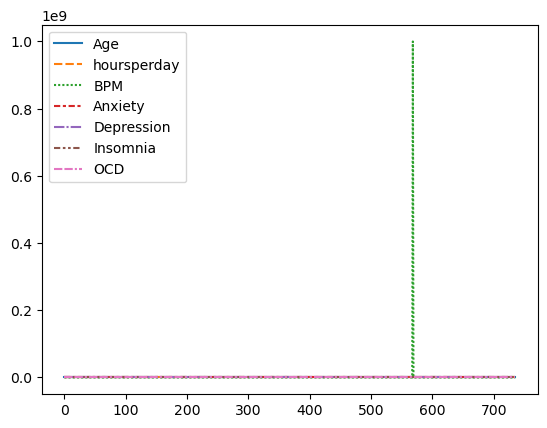

In [38]:
#lineplot of primary streaming service
sns.lineplot(data=dat.drop(['primarystreamingservice'], axis=1))
plt.show()

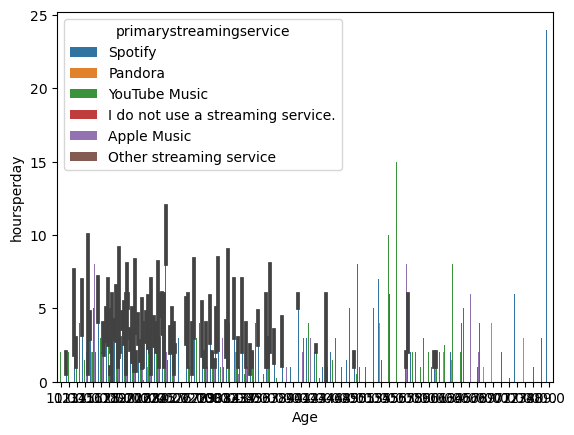

In [39]:
#barplot of primary streaming service on age against hours per day
sns.barplot(x='Age',y='hoursperday', data=dat,
            hue='primarystreamingservice')
 
plt.show()

# Boxplot

<AxesSubplot:title={'center':'hoursperday'}, xlabel='Age'>

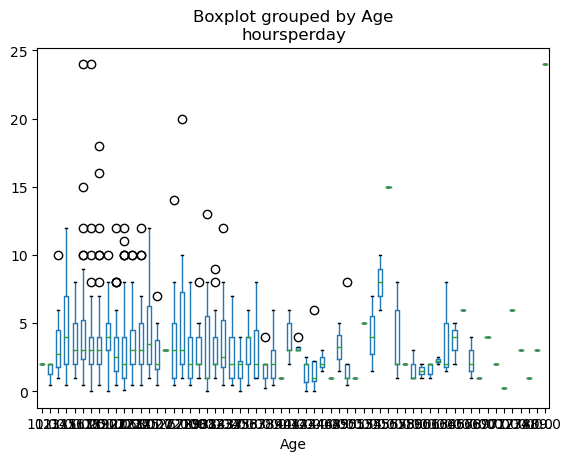

In [40]:
#boxplot grouped by age
dat.boxplot(by ='Age', column =['hoursperday'], grid = False)

<AxesSubplot:title={'center':'Age'}, xlabel='primarystreamingservice'>

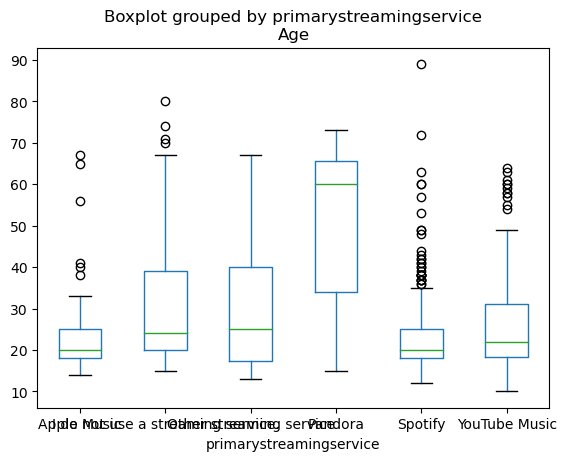

In [41]:
#boxplot grouped by primary streaming service
dat.boxplot(by ='primarystreamingservice', column =['Age'], grid = False)

<AxesSubplot:xlabel='Age', ylabel='primarystreamingservice'>

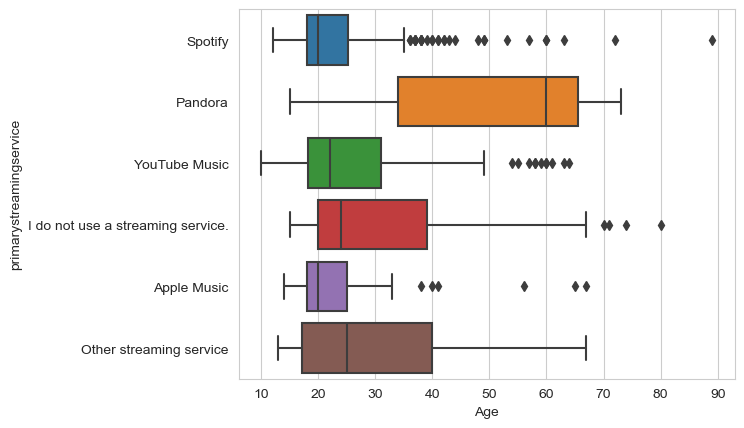

In [42]:
# subplot on Primary streaming service  against age 
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Age', y = 'primarystreamingservice', data = dat)

<AxesSubplot:xlabel='hoursperday', ylabel='Age'>

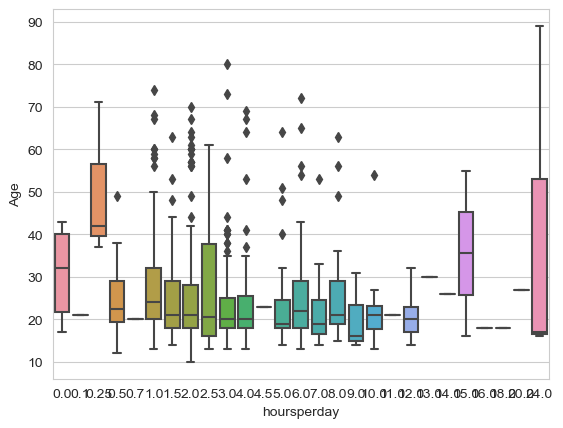

In [43]:
#set_style 
sns.set_style("whitegrid")
  
sns.boxplot(x = 'hoursperday', y = 'Age', data = dat)

# Bubble chart

In [44]:
#buble chart age vs fav genre
fig = px.scatter(dat, x="Age", y="favgenre",)
fig.update_layout(title_text='FAV GENRE VS AGE', title_x=0.5)
fig.show()

TypeError: 'module' object is not callable

In [ ]:
#bubble chart hours per day vs primary streaming service 
fig = px.scatter(dat, x="hoursperday", y="primarystreamingservice")
fig.show()

# Tree Map

In [ ]:
# Simple treemap showing country level data and sizing the rectangles based on the pop field
px.treemap(dat, path=['favgenre'], values='hoursperday')

In [ ]:
px.treemap(dat, path=['frequency[Rap]'], values='hoursperday')

In [ ]:
px.treemap(dat, path=['frequency[Rap]'], values='Age')

In [ ]:
px.treemap(dat, path=['frequency[R&B]'], values='hoursperday')

In [ ]:
# draw lineplot
sns.lineplot(x="hoursperday", y="primarystreamingservice", data=dat)
 
# setting the title using Matplotlib
plt.title('Title using Matplotlib Function')
 
plt.show()

In [ ]:
sns.barplot(x='Age',y='favgenre', data=dat,
            hue='primarystreamingservice')
 
plt.show()

In [ ]:
# instantiating the figure object
graph = figure(title = "Bokeh Bar Chart")
# plotting the graph
graph.vbar(dat['Age'], top=dat['hoursperday'],
           legend_label = "Age Vs hoursperday", color='green')
 
graph.vbar(dat['Anxiety'], top=dat['Depression'],
           legend_label = "Anxiety vs Depression", color='blue')
 
graph.legend.click_policy = "hide"
 
# displaying the model
show(graph)

In [ ]:
# plotting the scatter chart
fig = px.line(dat, y='Age', color='favgenre')
 
# showing the plot
fig.show()

In [ ]:
# plotting the scatter chart
fig = px.bar(dat, x='Age', y='hoursperday', color='favgenre')
 
# showing the plot
fig.show()

In [ ]:
plot = px.Figure(dat=[px.Scatter(x=dat['primarystreamingservice'],y=dat['Age'],mode='markers',)])
 
# Add dropdown
plot.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=["type", "scatter"],
                    label="Scatter Plot",
                    method="restyle"
                ),
                dict(
                    args=["type", "bar"],
                    label="Bar Chart",
                    method="restyle"
                )
            ]),
        ),
    ]
)
 
plot.show()